In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
# To use only Google Colab
# ! pip install matplotlib --upgrade

# Unidad I. Variables, distribuciones y pruebas de hipótesis. 


## Prueba de Hipótesis.

- Prueba de bondad de ajuste a una distribución.
  - Procedimientos no paramétricos:
    - chi cuadrado
    - Kolmogorov–Smirnov
- Comparación de dos poblaciones.
 - Test de Student y Fischer:
   - para comparar variables independientes con distribución normal.
 - Test de Student para comparar variables apareadas.
 - Alternativas no paramétricas.
   - test de Mann Whitney
   - test de Wicolxon.
 - Otras pruebas de comparación no paramétricas:
   - test de Kolmogorov-Smirnov
   - test de la Mediana.
   - test de los signos
   - test de McNemar.


## Estadística inferencial

- Trata de inferir información acerca de la distribución de probabilidad de una
  población
    - Parte de la información de una muestra.
- Tipos de intervalonferencias:
    - Estimación puntual:
      - Estimación de un parámetro poblacional haciendo uso del valor que mejor
        lo aproxime.
    - Estimación por intervalos:
      - Estimación de un intervalo de valores para un parámetro poblacional
        desconocido. Por ejemplo, la estimación de un intervalo de confianza.
    - Test de hipótesis.



## Test de hipótesis

- Es la evaluación estadítica de una suposición.
  - Se parte de considerar declaración que puede o no ser válida
  - A partir de esta declaración se definen dos hipótesis:
    - la hipótesis nula ($H_0$)
      - Típicamente implica que no hay una relación entre los datos o variables.
    - la hipótesis alternativa ($H_1$)
      - Esta es la hipótesis que queremos apoyar.
  - Se obtienen una muestra de datos para evaluar la hipótesis.
  - Si los datos apoyan $H_1$ con cierto nivel de confienza:
    - rechazo $H_0$ y acepto con $H_1$
    - No quiere decir que se haya demostrado $H_1$
  - Si los datos no apoyan $H_1$
    - no puedo rechazar $H_1$, ni aceptar $H_0$

## Tipos de errores

|                      | **$H_0$ es cierta**  | **$H_1$ es cierta**   |
|-------------------   |-------------------   |--------------------   |
| **Se escogió $H_1$** | *Error de tipo I*    | Decisión correcta     |
| **Se escogió $H_0$** | Decisión correcta    | *Error de tipo II*    |


La probabilidad del error de tipo I
  - se conoce como nivel de significación estadistica
  - indicado con la letra griega $\alpha$.
  - $P(escoger H_1 | H_0 cierta) = \alpha$

La probabilidad de caer en un error del tipo II
  - se anota con la letra griega $\beta$.
  - Siendo $1-\beta$ la potencia o poder del test.
  - $P(escoger H_0 | H_1 cierta) = \beta$
  - $P(escoger H_1 | H_1 cierta) = 1 - \beta$


### Valor P

- El valor P (*p value*)
  - Es la probabilidad de observar:
    - un determinado valor (o uno más extremo)
    - dado que H₀ es correcta.
  - No es la probabilidad de la hipótesis nula.
  - Un valor P bajo indica:
    - que los datos son inconsistentes con la hipótesis nula
    - permitiéndonos rechazarla
    - Para decidir que es un valor bajo
      - se recurre al valor de significación α.
      - debo elegir cuanto error puedo tolerar


### Test de T de Student para una muestra

- Permite evaluar si
  - la media de una muestra es diferente de una media $\mu_0$.
- El uso del test supone:
  - Distribución normal de la variable (continua) en la población
  - Muestreo al azar (cada observación es independiente)
- El estadístico $t$ sigue una distribución *T de Student* con $n - 1$ grados de libertad.
  - $ t = \frac{ \bar{x} - \mu }{ \frac{s}{\sqrt{n}} }$

Supongamos una variable aleatoria $X$ que en la población se distribuye con una
distribución $N(0, 1)$.

- Estamos interesados en apoyar que la media de esa variable $X$ en la
población es mayor a 0.
  - $H_0 : \mu = 0$
  - $H_1 : \mu > 0$
- el *p value* para un valor observado $T$ será:
  - $P(t \ge T|H_0)$

In [139]:
import scipy.stats as st
import math

normal_sample = st.norm.rvs(size = 10, loc=0)
df = len(normal_sample) - 1

# Calculando a mano
t_value = (normal_sample.mean()) / (normal_sample.std()/math.sqrt(df))
pvalue = 1-st.t.cdf(t_value, df)
print(t_value, pvalue)

0.5260409585529077 0.3057872481880983


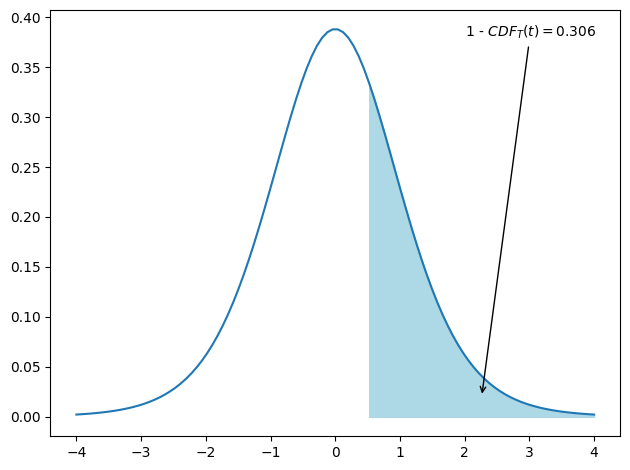

In [141]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4, 4, 100)

plt.plot(x, st.t.pdf(x, df))

x_fill = np.linspace(t_value, 4, 100)
plt.fill_between(
    x_fill,
    st.t.pdf(x_fill, df),
    color="lightblue"
)

plt.annotate(
    xy = ((4+t_value)/2, st.t.pdf((4+t_value)/2, df)/2),
    xytext = (2, 0.38),
    text = f"1 - $CDF_T(t) = {1-st.t.cdf(t_value, df):0.3f}$",
    arrowprops = {
        "arrowstyle":"->"
    }
)
plt.tight_layout()

In [ ]:
# Usando scipy
test_result = st.ttest_1samp(
    normal_sample,
    popmean=0,
    alternative="greater",
)



Otras dos hipótesis alternativas son posibles; $H_a \ne 0$ ó $H_a < 0$. Podemos elegir cualquiera de éstas dependiendo de nuestro hipótesis de trabajo, determinando si el test será a una o dos colas. En este caso el test será a una cola y el *p value* para un valor observado $T$ será: 




```{r}
n <- 5
normal_sample <- rnorm(n, mean=0.1, sd=0.1)
xm <- mean(normal_sample)
s <- sd(normal_sample)

# Hipotesis Nula. La distribución es T de Student
m0 <- 0
T_value <- (xm-m0)/(s/sqrt(n))
T_value

# Calculo el pvalue
p = 1 - pt(T_value, n-1)
p
# 0.0008768362

# Usando las funciones incluidas en R
t.test(
    normal_sample,
    alternative="two.sided",
    mu=0,
    )
# 0.0008768
```

El *p value* depende de si el test es a una o dos colas, en este caso, como la
distribución es simétrica alrededor del 0, es obvio que el *p value* para el
test a dos colas es el doble del *p value* que obtuvimos. Pero calcular el
*p value* a dos colas no es trivial, principalmente puede ser un problema para
distribuciones asimétricas. Pero en
general se toma la idea de doblar el valor del P value menor al testear las dos
opciones a una cola (es como si hiciéramos una *corrección de Bonferroni* al
haber realizado dos pruebas).  


En particular, para una variable aleatoria $X$, que sigue una determinada
distribución si $H_0$ es cierta, dado un estimador $x_0$, el *p value* es:

$P(X \geq x|H_0)$ prueba de una cola hacia la derecha y 
$P(X \leq x|H_0)$ prueba de una cola hacia la izquierda.

```{r}
par(mfrow=c(1,2))
my_t <- function(x) {return(dt(x, n-1))}
T_value <- 4
# p-value for 'greater'.
curve(
    my_t,
    from=-5,
    to=5,
    xlab="T",
    ylab="P",
    main="Cola derecha")

# Área bajo la curva, 'greater'.
polygon(
    c(T_value, seq(T_value, 5, 0.01), 5),
    c(0, my_t(seq(T_value, 5, 0.01)),0),
    col = "darksalmon")

# p-value for 'lower'.
curve(
    my_t,
    from=-5,
    to=5,
    xlab="T",
    ylab="P",
    main="Cola izquierda")

# Área bajo la curva, 'lower'.
polygon(
    c(-5, seq(-5,T_value, 0.01), T_value),
    c(0, my_t(seq(-5,T_value,0.01)),0),
    col = "darksalmon")

```

Para el test a dos colas (*double-tailed event*):
$$2 \times min({P(X \leq x|H_0), P(X \geq x|H_0)})$$


```{r}
my_t <- function(x) {return(dt(x, n-1))}

# p-value for 'greater'.
curve(
    my_t,
    from=-5,
    to=5,
    xlab="T",
    ylab="P",
    main="Dos colas")

# Área bajo la curva, 'greater'.
polygon(
    c(T_value, seq(T_value, 5, 0.01), 5),
    c(0, my_t(seq(T_value, 5, 0.01)),0),
    col = "darksalmon")


# Área bajo la curva, 'lower'.
polygon(
    c(-5, seq(-5,-T_value, 0.01), -T_value),
    c(0, my_t(seq(-5,-T_value,0.01)),0),
    col = "darksalmon")
```

### Intervalo de confianza

El intervalo de confianza
es un tipo de estimador por intervalo para un parámetro de la población. Se
calcula a partir de una o más muestras de la población, y posee un
**nivel de confianza** que determina qué tan frecuentemente una serie de
intervalos estimados de la misma manera contiene al parámetro poblacional.

Es importante notar que el intervalo de confianza calculado a partir de una única
muestra puede no contener al parámetro a estimar, pero aún así es una buena
estimación intervalar del mismo. Así un intervalo con una confianza del 95%,
significa que de un número `N` de intervalos calculados, `0.95N` contendrán al
parámetro a estimar. No debe interpretarse nunca como un intervalo con una
probabilidad del 95% de contener el parámetro.

El intervalo para una media se calcula utilizando el valor crítico de $t$ si la
desviación estándar proviene de la muestra o $Z$ si se conoce la desviación
estándar de la población. Los valores críticos son aquellos valores de $t$ o $Z$
que dejan un área de $\frac{\alpha}{2}$ hacia la izquierda del menor valor
crítico, y el mismo hacia la derecha (dejando un área $1-\alpha$ en el
intervalo).

Así el valor crítico, utilizando la distribución T de Student con $n-1$ grados
de libertad, para una confianza del 95% ($\alpha = 5%$) puede calcularse con la
función *qt* (para calcular cuantiles).

```{r}
t_left <- qt(0.05/2, df = n-1) # 2.5 %
t_right <- qt(1-0.05/2, df = n-1) # 97.5 %

t_left
t_right

```


Los valores son iguales en módulo dada la simetría de la distribución T de
Student. Siendo $t$ ese módulo, el intervalo de confianza para la media de la
población sería:

$$(\bar{x}-t\frac{s}{\sqrt{n}} , \bar{x}+t\frac{s}{\sqrt{n}})$$

```{r}
c(
    mean(normal_sample + t_left*sd(normal_sample)/sqrt(n)),
    mean(normal_sample + t_right*sd(normal_sample)/sqrt(n))
)
```

#### Nivel de confianza

```{r}
intervalos <- sapply(
    c(1:1000),
    function(x){
        normal_sample <- rnorm(5, mean=0.1, sd=0.1)
        t.test(normal_sample, alternative="two.sided", mu=0)$conf.int
    }
)
matplot(
    x=intervalos[,1:20],
    y=rbind(c(1:20), c(1:20)),
    type="l",
    col = "red",
    lty=1,
    ylab="Rangos",
    xlab="Intervalos"
)
abline(v=0.1)
```

```{r}
contains_mu <- intervalos[1,] < 0.1 & 0.1 < intervalos[2,]
mean(contains_mu)
```

### Bootstrap

**Bootstrap** nos permite obtener estimaciones puntuales o por intervalos, en
particular, intervalos de confianza, para parámetros poblacionales sin necesidad
de conocer la distribución subyacente.

Básicamente la técnica de *bootstrap* se basa en hacer un muestreo aleatorio con
reemplazo de nuestra muestra, calculando el parámetro de interés en cada
muestra.

La muestra de la que se parte debe ser una muestra representativa, en particular
debe complir con ser una muestra de valores independientes e idénticamente
distribuidos. Si bien la distribución de la variable de interés en la población
no forma parte de los supuestos del método, una implementación *naïve* puede
generar resultados incorrectos con distribuciones con colas pesadas. *Bootstrap*
también puede presentar problemas con distribuciones discretas y poco densas.


```{r}
my_sample <- c(
    rnorm(50, 3, 2),
    runif(50, 0,6)
)

replicates <- replicate(
    1000,
    sample(
        x = my_sample,
        size=100,
        replace=TRUE
    )
)

means <- apply(replicates, 2, mean)
hist(means, 100)

quantile(means, 0.025)
quantile(means, 0.975)

```

Esta implementación es muy sencilla, el paquete de R *boot* ofrece implementaciones más complejas.

```{r}
mmean <- function(d, i) {
    mean(d[i])
}
my_sample.boot <- boot(
    my_sample,
    mmean,
    R = 100,
    sim = "ordinary",
)
boot.ci(
    my_sample.boot,
    conf = c(0.90, 0.95),
    type = c("norm", "basic", "perc", "bca")
)
```

### Prueba de bondad de ajuste a una distribución.

Muchas veces es necesario saber cuando los datos de una muestra se ajustan a una determinada distribución. En ese sentido uno se puede preguntar si la distribución observada (en general, para una muestra) es igual, o no, a una distribución esperada (en general, para la población). Para testear ésto, disponemos de las siguientes pruebas:

#### Prueba χ²

La prueba χ² se puede utilizar para testear la bondad de ajuste de cualquier distribución univariada para la cual se pueda calcular la *CDF*. Dado que requiere datos en grupos, por lo que puede utilizarse para testear distribución para datos categóricos (a diferencia de  *KS*). Para poder utilizar el test en una distribución de probabilidad para datos continuos, debemos [discretizar/agrupar] los datos de la misma manera en que lo hacemos al calcular un histograma.

Debemos tener en cuenta q el test es sensible a la elección de los *bins*. Una desventaja de este test es que requiere de un tamaño muestral de al menos 1000 para que la aproximación χ² sea válida.


```{r}
observed <- rbinom(1000, 100, 0.05)
hist(observed, 100)
```

```{r}
xs <- seq(0, max(observed), 1) 
observed_cdf <- ecdf(observed)
plot(
    x=xs,
    y=observed_cdf(xs),
    pch=19,
    col="red")
points(
    x=xs,
    pbinom(q=xs, size = 100, p=0.055)
)

```

Dadas $k$ categorías, para la categoría $i$, $O_i$ representa la frecuencia observada para esa categoría, mientras $E_i$ representa la frecuencia esperada (nuestra hipótesis nula). 

$$ χ^{2} = \sum_{i=1}^{k}{\frac{(O_i - E_i)^{2}}{E_i}} $$

Ésta última, en el caso de haber generado *bins* para una variable continua, la calculamos usando la *CDF* evaluada en el extremo superior *bin*, menos su valor en el extremo inferior del *bin*. N es el tamaño de la muestra.

$$Ei=N(CDF(X_f)−CDF(X_i))$$


```{r}

Oi <- 1000 * observed_cdf(xs)
Ei <- 1000 * pbinom(q=xs, size = 100, p=0.054)

chi2 <- sum((Oi - Ei)^2/Ei)

df = 15 # (16 bins - 1) * (2 cond - 1)

pchisq(
    chi2,
    df,
    lower.tail=FALSE
    )

```

#### Prueba de Kolmogórov-Smirnov

La prueba de Kolmogorov-Smirnov es otra prueba de ajuste a una distribución que usa la función de densidad acumulada (*CDF*).

En particular, su estadístico, $D$ mide la distancia entre la *CDF* de la distribución, que suponemos correcta en la hipótesis nula, y la *ECDF* de la muestra. En particular, el estadístico $D$ es el valor máximo de las diferencias. Si la función de densidad acumulada empírica es igual a la función de densidad de nuestra distribución a ajustar, el estadístico $D$ será 0 ($H_0$: $D = 0$).

Éste es un test paramétrico, por lo que hace pocas supuestos, pero debe tenerse en cuenta que la distribución que suponemos en nuestra $H_0$ no puede tener parámetros libres, debe estar completamente determinada y debe ser **continua**. Es sensible tanto a cambios en la ubicación como en la forma de la distribución, pero no tiene gran poder, por lo que puede requerir un tamaño muestral grande para rechazar correctamente la hipótesis nula.


```{r}
?ks.test
my_sample <- rnorm(100, 2, 2)
ks.test(my_sample, "pnorm",2, 2)


my_sample <- rnorm(100, 2, 2)
my_other_sample <- rnorm(10000, 2, 2)
ks.test(my_sample, my_other_sample)
```

### Comparación de dos poblaciones.

```{r}
head(sleep)
```

#### ¿Son variables independientes con distribución normal?

```{r}
shapiro.test(
    sleep$extra[sleep$group==1]
)
shapiro.test(
    sleep$extra[sleep$group==2]
)
```

#### Tests de igualdad de varianza

```{r}
boxplot(
    extra ~ group,
    sleep)
```
```{r}
sapply(
    X=unique(levels(sleep$group)),
    FUN=function(g){
        var(sleep$extra[sleep$group==g])
    }
)
aggregate(
  extra~group,
  data=sleep,
  FUN=var
)

```

Todos los **test de igualdad de varianza** tienen como hipótesis nula que las varianzas son iguales.  
  
El **test F de igualdad de varianzas** tiene como supuesto que las distribuciones son normales.

```{r}
var.test(
    x=sleep$extra[sleep$group==1],
    y=sleep$extra[sleep$group==2]
)

var.test(
    extra ~ group,
    data=sleep
)

```

El **test de Bartlett** es sensible a las desviaciones de la normalidad, por lo que no es recomendable usarlo con distribuciones no normales.

```{r}
bartlett.test(
    extra ~ group,
    sleep
)
```

El **test de Levene** es robusto ante distribuciones no normales. 

```{r}
#library("car")
leveneTest(
    extra ~ group,
    sleep)
```

### Test de Student para dos muestras

El test de Student asume que las varianzas son iguales, pero
existe una alternativa a este test, test de Welch, que no
requiere asumir esta condición.

```{r}
sample_1 <- rnorm(n=25, mean=2, sd=1)
sample_2 <- rnorm(n=25, mean=5, sd=6)

t.test(
    x = sample_1,
    y = sample_2,
    var.equal = TRUE
)

t.test(
    x = sample_1,
    y = sample_2,
    var.equal = FALSE
)
```

#### Test de Student para muestras apareadas

Asume que los valores de ambas muestras corresponden a los mismos individuos en dos condiciones diferentes. Por ejemplo, antes y después de un tratamiento.

```{r}
sample_1 <- rnorm(25, 0, 1)
sample_2 <- sample_1 + runif(25, 0, 0.02)

sapply(
    c(TRUE, FALSE),
    FUN=function(x) t.test(sample_1, sample_2, paired=x)
)



```

### Alternativas no paramétricas

#### Mann Whitney

- Todas las observaciones son independientes en ambos grupos.
- La hipótesis nula asume que las distribuciones de las dos poblaciones son iguales.
- La hipótesis alternativa es que las dos distribuciones no son iguales.

```{r}
    sample_1 <- rexp(25, 1)
    sample_2 <- rexp(25, 2)
    t.test(
        sample_1,
        sample_2
    )
    wilcox.test(
        sample_1,
        sample_2
    )

```

#### Wilcoxon signed rank text

```{r}
sample_1 <- rexp(25, 1)
sample_2 <- sample_1 + runif(25,0,.5)
wilcox.test(
    sample_1,
    sample_2
)
wilcox.test(
    sample_1,
    sample_2,
    paired=TRUE)

```


#### Kolmogorov-Smirnov

```{r}
sample_1 <- rexp(25, 1)
sample_2 <- rexp(25, 4)

hist(
  sample_1,
  col="#FF000077")

hist(
  sample_2,
  col="#0000FF77",
  add=TRUE)


ks.test(
    sample_1,
    sample_2
)
```

#### Test de signos

En muestras pareadas, si la $H_0$ es verdad,
el número de veces que la diferencia entre pares es positiva debe distribuirse como una binomial con probabilidad 0.5.

```{r}
sample_1 <- rexp(25, 1)
sample_2 <- sample_1 + runif(25, -3, 3)

positives <- sum(sample_2>sample_1)
negatives <- sum(sample_2<sample_1)

pbinom(
    c(positives,negatives),
    size = 25,
    prob = 0.5,
    lower.tail = FALSE
)

sample_1 <- rexp(25, 1)
sample_2 <- sample_1 + runif(25, -1, 3)

positives <- sum(sample_2>sample_1)
negatives <- sum(sample_2<sample_1)

pbinom(
    c(positives,negatives),
    size = 25,
    prob = 0.5,
    lower.tail = FALSE
)


```

#### Test de la mediana

Es un caso especial de la prueba de **chi-cuadrado**. Esta prueba posee poco poder.  
Se calcula la mediana para todos los datos ($x$ e $y$), estableciéndose dos grupos (por encima o por debajo de ésta). Luego se arma una tabla de contingencia con esta nueva variable versus las dos variables anteriores ($x$ e $y$).


```{r}
sample_1 <- rbinom(25, 15, 0.04 )
sample_2 <- rbinom(25, 15, 0.1 )
m <- median(c(sample_1, sample_2))

table(c(sample_1, sample_2)>=m,
    rep(1:2, each=25))

chisq.test(
    table(
        c(sample_1, sample_2)>=m,
        rep(1:2, each=25)))

```

#### Test de Fischer

Se usa si se tienen dos variables nominales, y se quiere saber si
las proporciones de una variable se mantiene entre los valores de
la otra variable.


```{r}
sample_1 <- rbinom(25, 15, 0.04 )
sample_2 <- rbinom(25, 15, 0.1 )
fisher.test(
    table(
        c(sample_1, sample_2)>=m,
        rep(1:2, each=25))
)

```

#### McNemar test

Se usa para buscar diferencias en tablas de contingencia cuando se tienen muestra aparedas.

```{r}
sample_1 <- rbinom(25, 15, 0.04 )
sample_2 <- sample_1 + runif(25, 1, 2 )
mcnemar.test(
    table(
        c(sample_1, sample_2)>=m,
        rep(1:2, each=25))
)
fisher.test(
    table(
        c(sample_1, sample_2)>=m,
        rep(1:2, each=25))
)
```
